# Prática 03 - Clustering

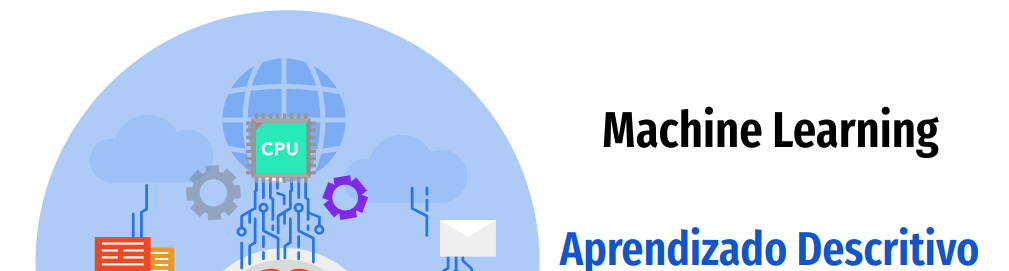

**Pessoas estudantes**:
- José Vitor Velozo de Carvalho (jvvc@cesar.school)
- Matheus Pereira do Rego Barros (mprb@cesar.school)

**Objetivo da Prática**

```
O objetivo desta prática é construir um técnica de clusterização baseada no K-means para o dataset Iris. Além disso, vamos avaliar baseado em métricas de clusterização.
```

**Instruções para a prática.**

1. Importar o dataset da célula descrita neste notebook.

2. Seuir as instruções detalhadas abaixo (9 etapas).

3. **Submeter no Classroom até a data limite. Após o prazo limite, punição de 10 pontos por dia de atraso.**

4. Use o chatGPT com moderação. Ele não acerta sempre não viu? 😅



![img](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

O conjunto de dados flor Iris, também conhecido como conjunto de dados Iris ou conjunto de dados Iris de Fisher, é um conjunto de dados frequentemente usado em aprendizado de máquina e estatística como exemplo para técnicas de classificação, clusterização e visualização de dados. Este conjunto de dados foi introduzido pela primeira vez pelo estatístico e biólogo britânico Sir Ronald Fisher em 1936 em seu artigo "The Use of Multiple Measurements in Taxonomic Problems" como um exemplo de análise discriminante linear.

O conjunto de dados consiste em amostras de três espécies diferentes de flores Iris:
- Iris setosa
- Iris virginica
- Iris versicolor.

Para cada amostra, são fornecidas quatro características: o comprimento e a largura das sépalas (parte externa da flor) e o comprimento e a largura das pétalas (parte interna da flor). Essas características foram medidas em centímetros.

Aqui está uma descrição mais detalhada das características:

- Comprimento da Sépala (em centímetros)
- Largura da Sépala (em centímetros)
- Comprimento da Pétala (em centímetros)
- Largura da Pétala (em centímetros)
- Espécie da flor Iris (Iris setosa, Iris virginica ou Iris versicolor)

Este conjunto de dados é amplamente disponível e é considerado um padrão na comunidade de aprendizado de máquina para testar e validar algoritmos e técnicas. Ele também é frequentemente usado em tutoriais e cursos introdutórios de aprendizado de máquina devido à sua simplicidade e clareza

Nesta base, vamos tentar agrupar as flores por informações do tamanho de suas pétalas

1. Carregue a base e visualize algumas informações sobre a mesma [**5 Pontos**]
- head, info, describe

2. Selecione apenas as características relacionadas às pétalas [**5 Pontos**]
- 'petal length (cm)', 'petal width (cm)'

3. Plote a dispersão dessas características [**5 Pontos**]
- plt.scatter

4. Padronize os dados (não é recomendado utilizar técnicas não-lineares) [**15 Pontos**]
- Avalie qual método utilizar de acordo com as técnicas vistas
- Plote novamente a dispersão

5. Crie e treine modelos KMeans com valores de k que achar válido (de acordo com a visualização) [**15 Pontos**]

6. Plote a dispersão juntamente com os kmeans.cluster_centers_ e cores correspondentes aos grupos [**10 Pontos**]
- `kmeans.labels_` pode ser utilizado como cores

7. Analise o melhor valor de K utilizando o método Elbow baseado na inércia
kmeans.inertia_ [**15 Pontos**]

8. Analise o melhor valor de K utilizando o Silhouette Score
silhouette_score [**15 Pontos**]

9. Baseando-se no melhor k encontrado: [**15 Pontos**]
- compare o resultado obtido com as espécies reais visualmente
- descreva os representantes dos grupos (centróides) e cada um dos clusters encontrados com base em suas características
- qual(is) técnica(s) poderiam ser utilizadas caso fosse necessário encontrar outliers? Implemente e demonstre visualmente.

## Parte 1 - Importação do Dataset

**Pontuação: Sem pontuação nesta etapa.**

Seguir a célula abaixo!

In [40]:
from scipy.stats import shapiro
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [41]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['species'] = iris['target_names'][iris['target']]

In [42]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
original_df = df.copy()
df = df[['petal length (cm)', 'petal width (cm)']]

## Parte 2 - Tratamento dos dados

Na etapa anterior, pudemos perceber que não há dados nulos de x1 e x2. Agora, vamos observar as características desses dados e aplicar os seus devidos tratamentos.

### Entendendo a distribuição dos dados

Podemos perceber que temos uma grande quantidade de dados concentrados em pétalas relativamente menores, e ao mesmo tempo uma distribuição mais extensa à direita, com um intervalo de valores maior.

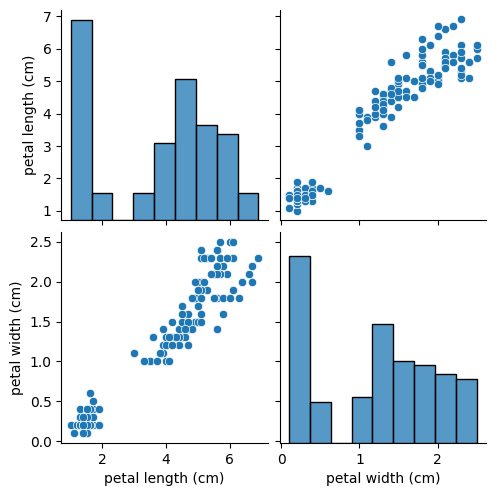

In [46]:
sns.pairplot(df)
plt.show()

In [47]:
columns_to_plot = ['petal length (cm)', 'petal width (cm)']

In [48]:
def box_plot(columns: list[str]) -> None:
  fig = px.box(df, y=columns, title='Interactive Box Plot of Petal Length and Width')
  fig.update_layout(xaxis_title='Feature', yaxis_title='Length (cm) / Width (cm)')

  fig.show()

Ao observarmos o box plot, é possível observar que não há outliers em x1 ou x2, entretanto, o intervalo de valores entre as duas features é bem diferente. Para prosseguirmos, iremos normalizar esses dados. Mas antes, vamos observar como isso se relaciona à distribuição:

In [49]:
box_plot(columns_to_plot)

In [50]:
def violin_plot(columns: list[str]) -> None:
  fig = px.violin(df, y=columns, title='Interactive Violin Plot of Petal Length and Width', box=True, points="all")
  fig.update_layout(xaxis_title='Feature', yaxis_title='Length (cm) / Width (cm)')

  fig.show()

Seguindo o mesmo padrão observado anteriormente no scatter plot, conseguimos ver que temos um espaçamento entre duas coleções densas, entretanto, o espaçamento da coleção superior é bem maior.

In [51]:
violin_plot(columns_to_plot)

### Testando as distribuições

Não foi possível detectar distribuição normal nas features.

In [52]:
def print_sw_res(column: str, series: pd.Series, alpha: float = 0.05) -> None:
  stat, p_value = shapiro(series)
  print(f"Column '{column}':")
  print(f"  Shapiro-Wilk Test Statistic: {stat}")
  print(f"  p-value: {p_value}")
  if p_value > alpha:
      print("  Distribution IS likely normal ✔")
  else:
      print("  Distribution is NOT likely normal X")

In [53]:
for column in df.columns:
  print_sw_res(column, df[column])
  print()

Column 'petal length (cm)':
  Shapiro-Wilk Test Statistic: 0.8762680554631075
  p-value: 7.412263135173186e-10
  Distribution is NOT likely normal X

Column 'petal width (cm)':
  Shapiro-Wilk Test Statistic: 0.9018349381915991
  p-value: 1.680465210314913e-08
  Distribution is NOT likely normal X



### Padronizando os dados

Vamos aplicar o standard scaling às features para que tenham um range similar.

In [54]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)
df = pd.DataFrame(df_scale, columns=df.columns)
df

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444
...,...,...
145,0.819596,1.448832
146,0.705921,0.922303
147,0.819596,1.053935
148,0.933271,1.448832


In [55]:
df.describe()

,petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02
mean,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00
min,-1.567576e+00,-1.447076e+00
25%,-1.226552e+00,-1.183812e+00
50%,3.364776e-01,1.325097e-01
75%,7.627583e-01,7.906707e-01
max,1.785832e+00,1.712096e+00


Agora é possível ver que os valores variam na escala de cerca de -1.5 a 1.5. Mas para melhor visualizarmos, vamos ver o box plot.

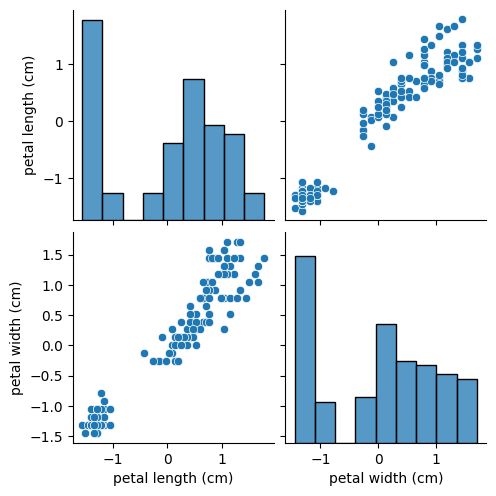

In [56]:
sns.pairplot(df)
plt.show()

Agora, podemos ver que os valores estão variando de cerca de 1.7 a cerca de -1.5.

In [57]:
box_plot(columns_to_plot)

In [58]:
violin_plot(columns_to_plot)

Escolher K = 2, apesar de os dois grupos, em inspeção visual, serem não isotrópicos, é uma decisão que parece ser mais coesa do ponto de vista de distância inter-cluster e intra-cluster. Entretanto, métricas visuais podem não ser eficientes. O melhor seria utilizar diferentes valores de K e testá-los, como será feito a seguir.

## Parte 3 - Modelando com K-Means

Para o experimento a seguir, iremos nos utilizar de um range de 2 a 6 para K, e para intuitos de reproducibilidade, utilizaremos um random_state de 123.

In [59]:
x1 = 'petal length (cm)'
x2 = 'petal width (cm)'

In [60]:
range_n_clusters = range(2, 7)

In [61]:
random_state = 123

In [62]:
def get_clusters_data(
    df: pd.DataFrame,
    x1: str,
    x2: str,
    kmeans_results: list,
) -> list[dict]:
    data = []
    for i, kmeans_res in enumerate(kmeans_results, 1):
        cluster_data = {
            "x1": df[x1],
            "x2": df[x2],
            "labels": kmeans_res.labels_,
            "centers": kmeans_res.cluster_centers_,
            "n_clusters": kmeans_res.n_clusters
        }
        data.append(cluster_data)
    return data

Treinando KMeans com diferentes valores de K e salvando os resultados. Vale salientar que por padrão o SKLearn utiliza-se de K-Means++.

In [63]:
kmeans_results = []
silhouette_scores = []

for k in range_n_clusters:
  kmeans = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
  kmeans.fit(df)
  silhouette_avg = silhouette_score(df, kmeans.labels_)
  silhouette_scores.append(silhouette_avg)
  kmeans_results.append(kmeans)

In [64]:
cluster_data = get_clusters_data(df, x1, x2, kmeans_results)

In [65]:
def plot_clusters(data: list[dict], x1: str, x2: str) -> None:
    plt.figure(figsize=(8, 6))
    plt.scatter(data["x1"], data["x2"], c=data["labels"], cmap='viridis', s=50, alpha=0.5)
    plt.scatter(data["centers"][:, 0], data["centers"][:, 1], c='red', s=100, marker='o', label='Centroids')
    plt.title(f'KMeans Clustering Results (k = {data["n_clusters"]})')
    plt.xlabel(x1)
    plt.ylabel(x2)
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.legend()
    plt.show()

Ao observar os resultados visualmente, podemos percber que do ponto de vista de distância intercluster, o K = 2 parece ser o melhor. Entretanto, o K = 3 não parece mau. A partir de 4, os agrupamentos ficam mais difíceis de visualizar.

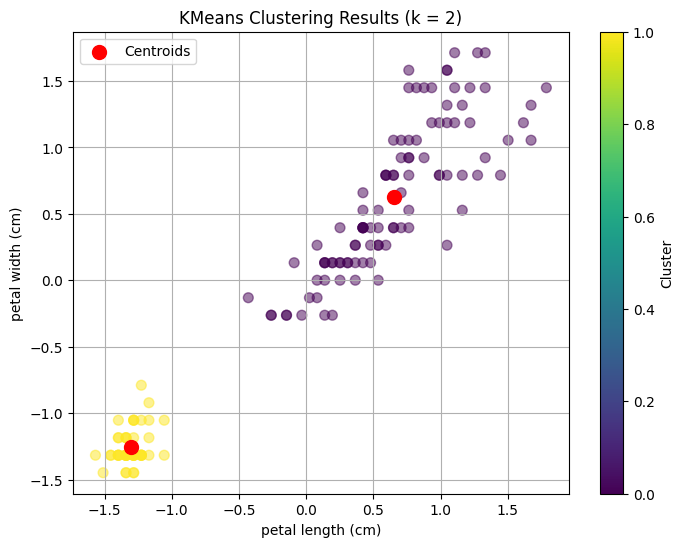

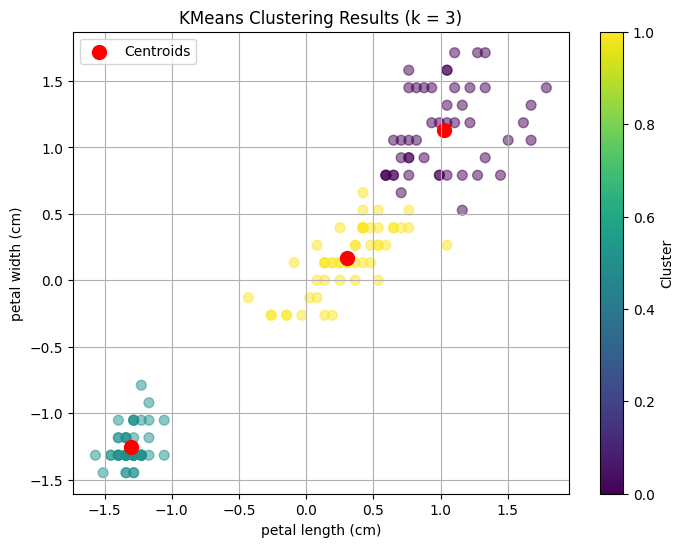

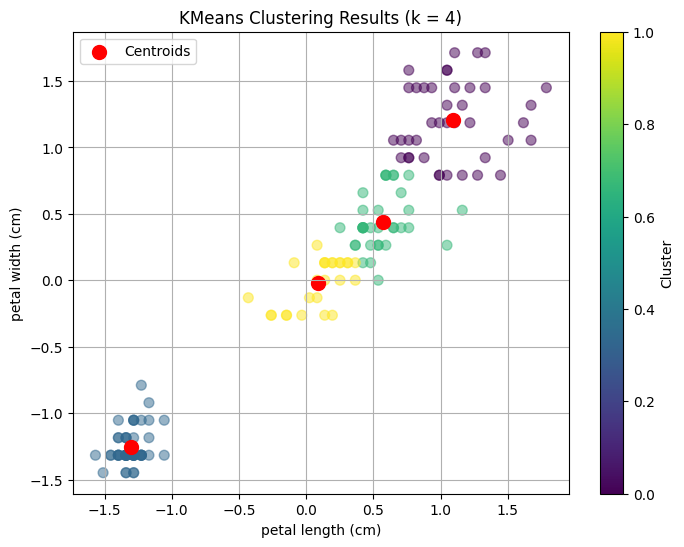

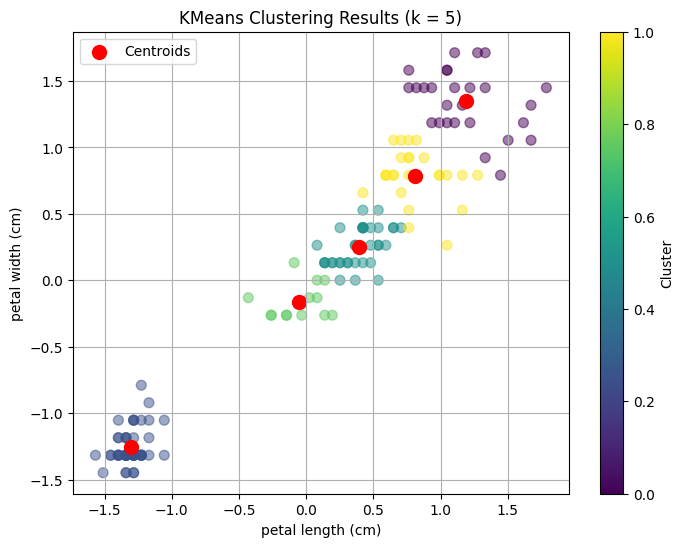

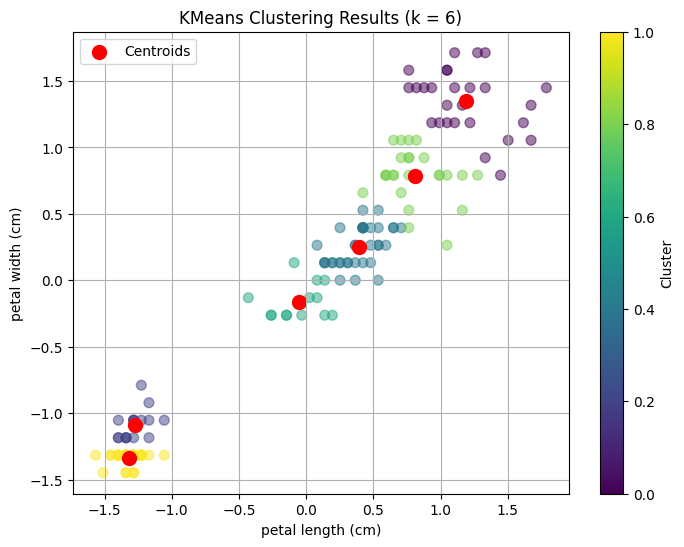

In [66]:
for i, data in enumerate(cluster_data, 1):
    plot_clusters(data, x1, x2)

Utilizando a inércia, podemos perceber um valor de cotovelo quando K = 3, que é um bom candidato para ser nosso valor de K.

In [67]:
def plot_elbow_method(inertia: list[float], range_n_clusters: list[int]) -> None:
  plt.plot(range_n_clusters, inertia, marker='o')
  plt.xlabel('Número de clusters (K)')
  plt.ylabel('Inércia')
  plt.title('Método Elbow para Determinar K')
  plt.xticks(range_n_clusters)
  plt.grid(True)
  plt.show()

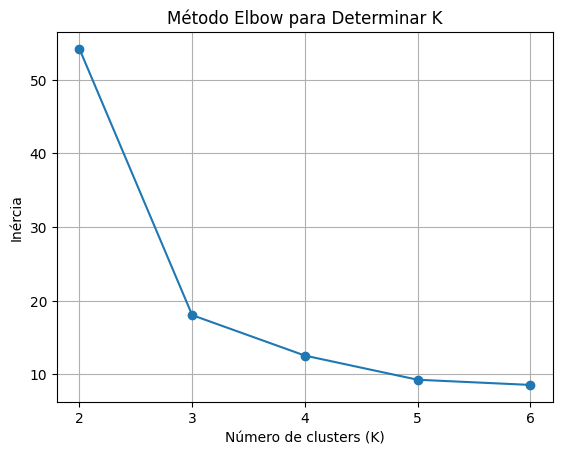

In [68]:
inertia = [km.inertia_ for km in kmeans_results]
plot_elbow_method(inertia, range_n_clusters)

Observando o silhouette score, podemos perceber que possuímos uma média mais alta quando K = 2, uma vez que a distância inter-cluster melhora bastante. Entretanto, muitos valores do cluster 0 ficam abaixo da média, apenas uma pontinha fica depois da média. Por sua vez, o K = 3 possui um escore menor, entretanto os data points estão, em sua maioria, acima da média. Aliando isso ao elbow method, K = 3 vai se tornando um forte candidato.

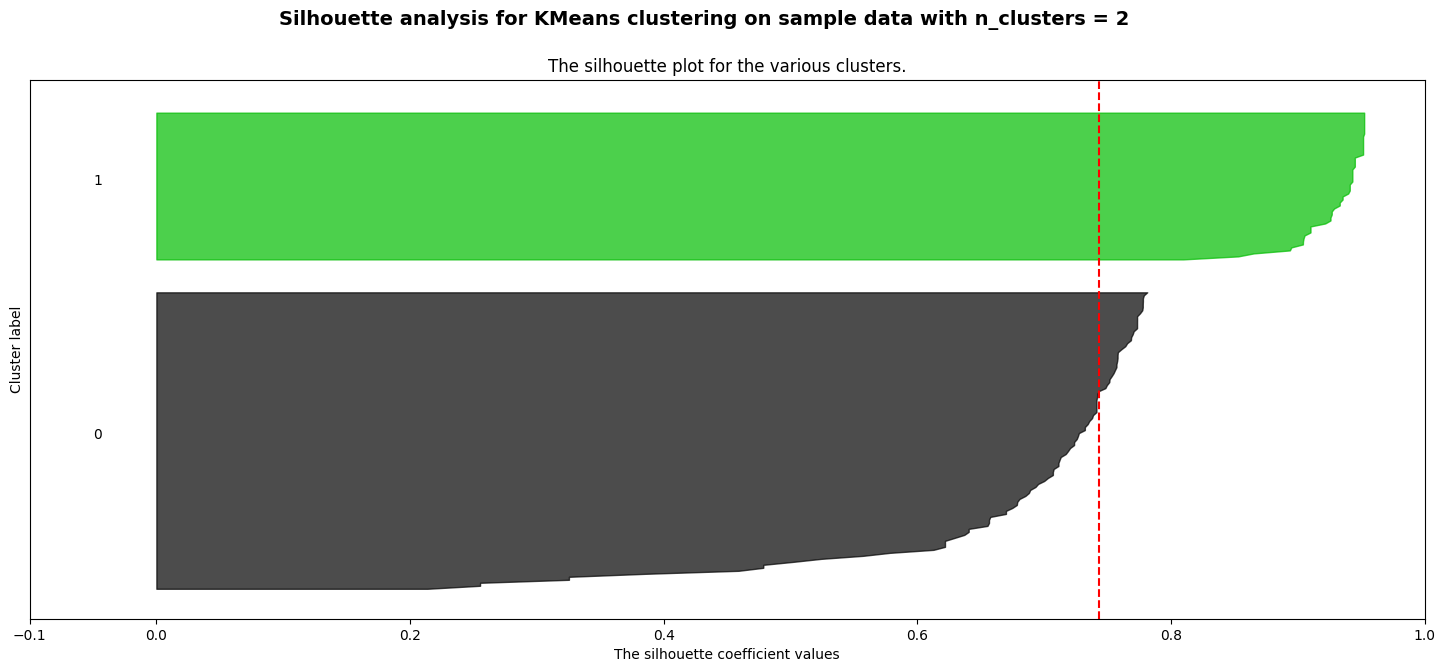

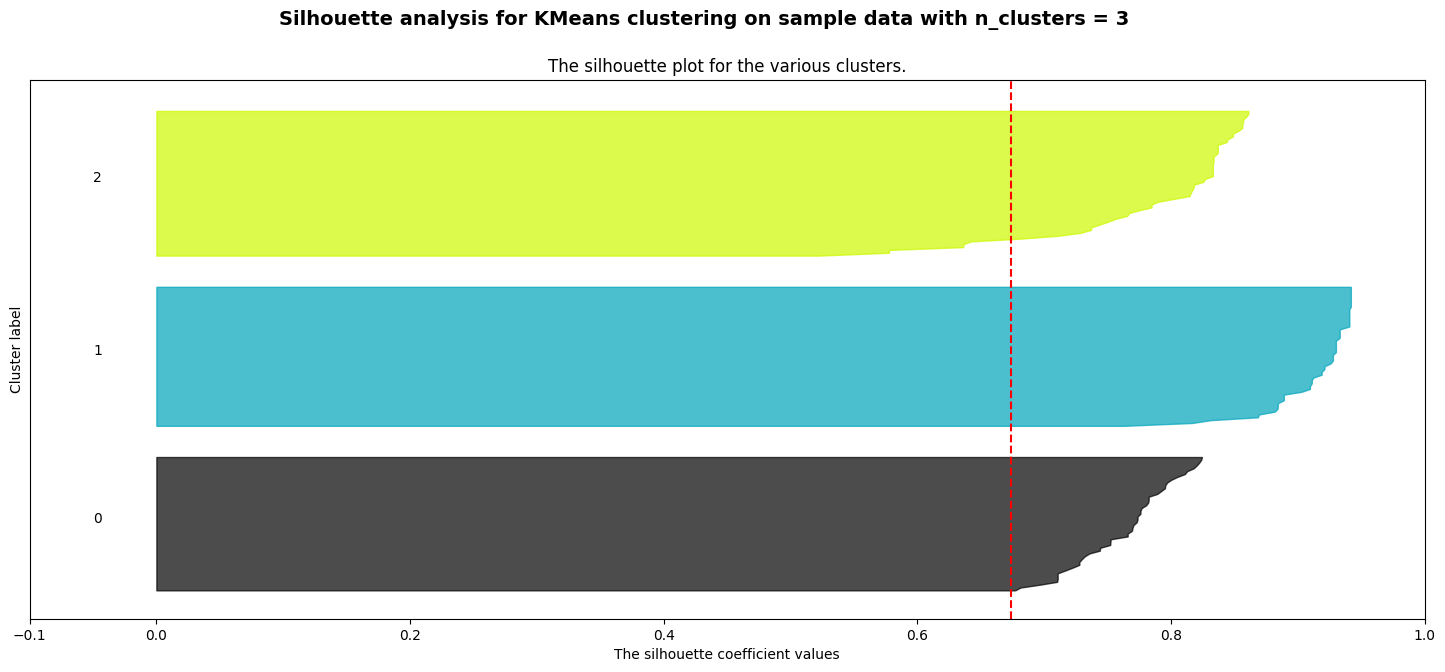

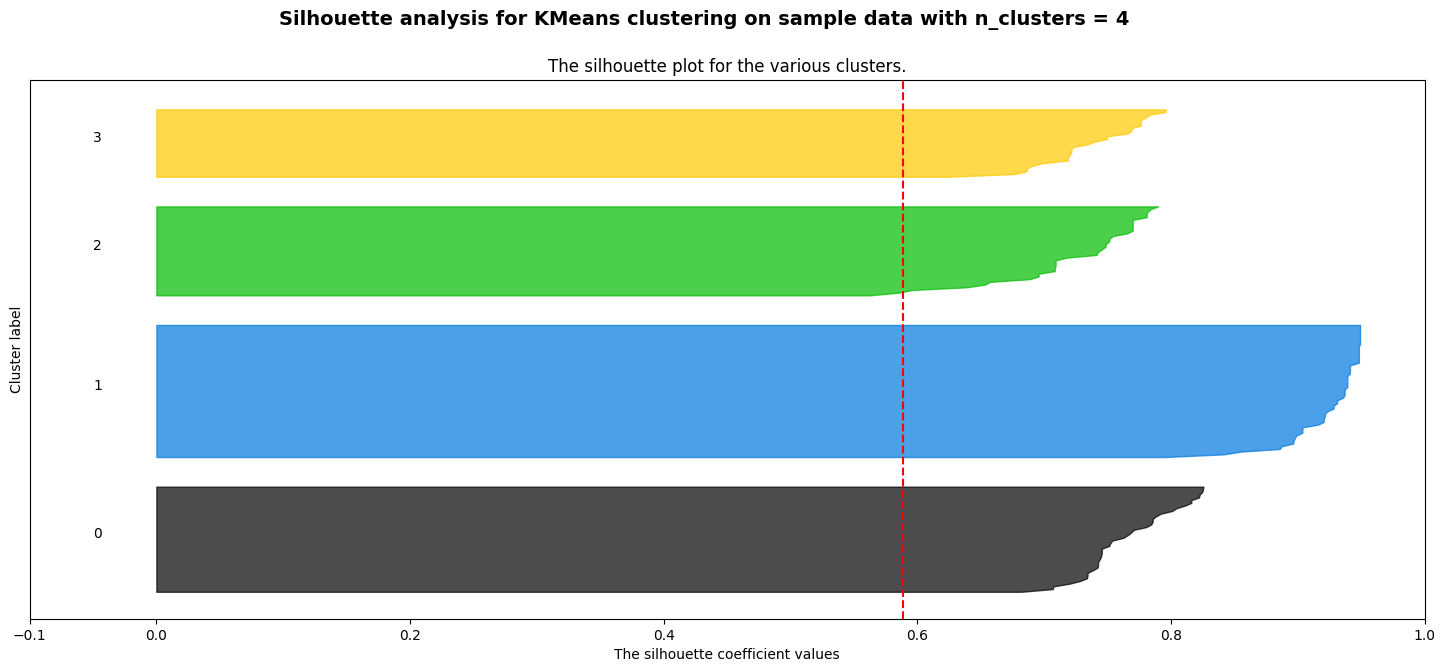

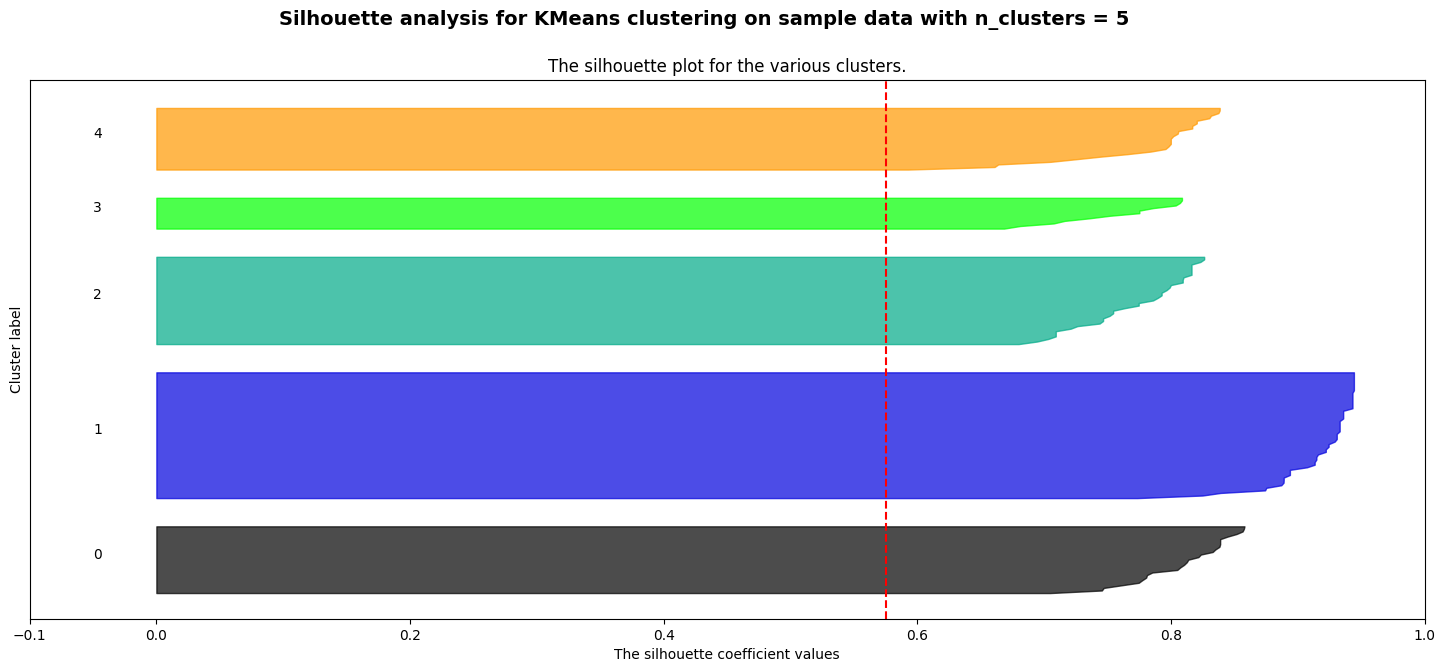

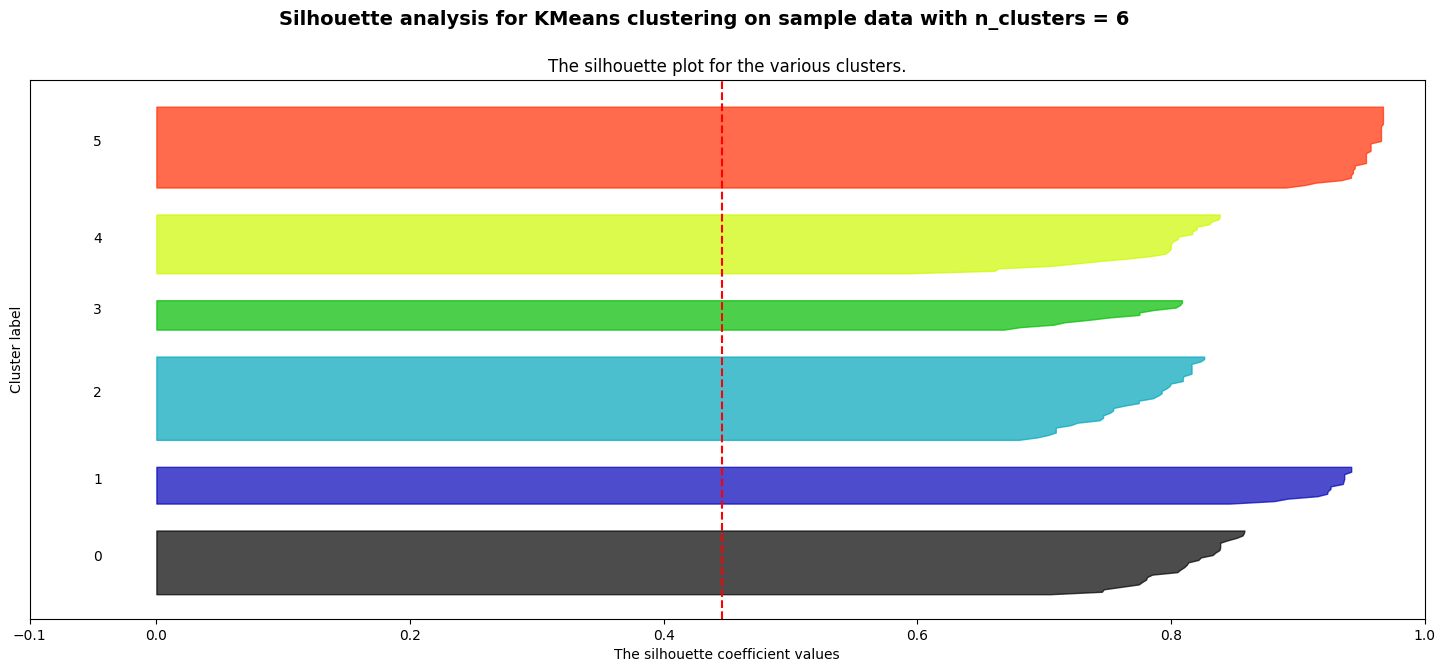

In [69]:
for k, silhouette_avg in zip(range_n_clusters, silhouette_scores):
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
    kmeans.fit(df)
    df_copy = df.copy()

    df_copy['cluster'] = kmeans.labels_

    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_copy) + (k + 1) * 10])

    sample_silhouette_values = silhouette_samples(df_copy, kmeans.labels_)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[df_copy['cluster'] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % k,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

Dessa forma, a decisão tomada foi seguir com K = 3.

In [70]:
kmeans = kmeans_results[1]

## Parte 4 - Avaliando nossos resultados


Agora, vamos avaliar como ficaram os resultados do nosso modelo com K = 3.

### K-Means vs. Espécies reais

Em uma comparação visual, podemos perceber que o modelo se adaptou muito bem para detectar o grupo setosa, entretanto, entre a versicolor e a virginica, a distinção não é tão precisa.

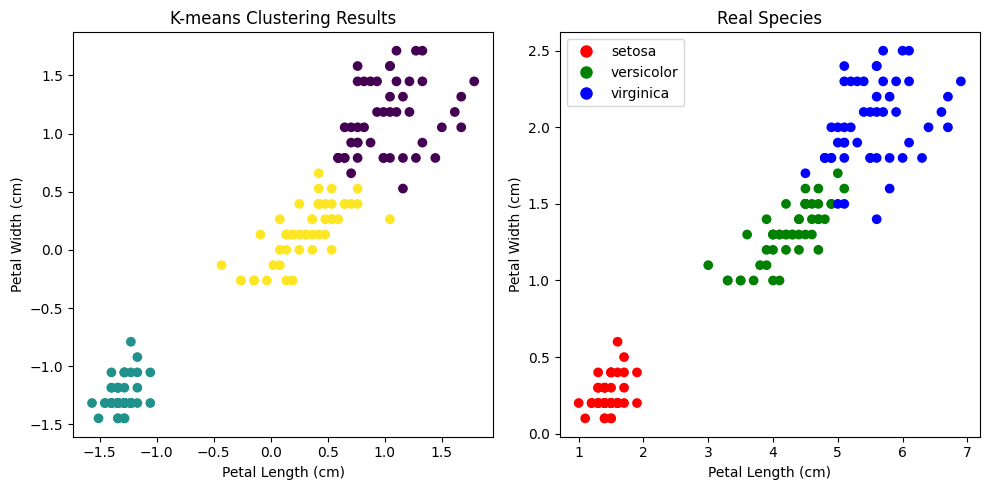

In [71]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering Results')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

species_colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = original_df['species'].map(species_colors)
plt.subplot(1, 2, 2)
plt.scatter(original_df['petal length (cm)'], original_df['petal width (cm)'], c=colors)
plt.title('Real Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=species) for species, color in species_colors.items()]
plt.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()



### Observando os centroides

Observando os centroides, é possível ver que existem certas concentrações, entretanto, talvez seja mais fácil e intuitivo observar e tirar conclusões dos dados com os valores originais.

In [72]:
centroids = kmeans.cluster_centers_

print("Centroids:")
print(centroids)

Centroids:
[[ 1.02799959  1.12797813]
 [-1.30498732 -1.25489349]
 [ 0.3058728   0.16541778]]


Agora, podemos perceber melhor os padrões de cada centroide. De forma tabular, podemos começar a ter intuições, mas vamos visualizá-los mais uma vez, agora com os dados originais.

In [73]:
original_centroids = scaler.inverse_transform(centroids)

result_df = pd.DataFrame(original_centroids, columns=df.columns)
result_df

,petal length (cm),petal width (cm)
0,5.566667,2.05625
1,1.462000,0.24600
2,4.296154,1.32500


Agora é possível visualizar espacialmente onde cada centroide se encontra. Temos que o grupo 1, visualmente parecido com a setosa, se caracteriza por pétalas bem pequenas em ambas as dimensões. Por sua vez, o 0 (virginica) e o 2 (versicolor) são bem mais parecidos, entretanto, em média, a virginica é a maior em ambas as dimensões.

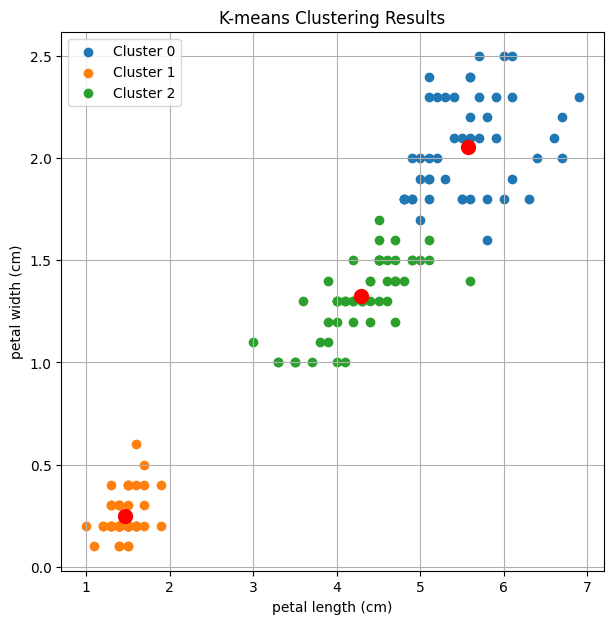

In [74]:
idf = scaler.inverse_transform(df)
plt.figure(figsize=(7, 7))
for label in set(kmeans.labels_):
    plt.scatter(idf[kmeans.labels_ == label, 0], idf[kmeans.labels_ == label, 1], label=f'Cluster {label}')
plt.scatter(result_df['petal length (cm)'], result_df['petal width (cm)'], c='red', s=100, marker='o')
plt.title('K-means Clustering Results')
plt.xlabel(x1)
plt.ylabel(x2)
plt.grid(True)
plt.legend()
plt.show()

### Encontrando outliers

O DBSCAN é uma técnica de clustering baseada em densidade, eficaz para detectar outliers. Após ajustar o modelo aos dados, os pontos rotulados como -1 são considerados outliers. Vamos visualizar quais outliers poderemos detectar com os seguintes parâmetros:

In [75]:
def plot_dbscan(df: pd.DataFrame, x1: str, x2: str, epsilon: float = 0.5, min_samples = 5) -> None:
  dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
  dbscan.fit(df)

  outliers = df[dbscan.labels_ == -1]

  plt.scatter(df[x1], df[x2], c=dbscan.labels_, cmap='viridis')
  plt.scatter(outliers[x1], outliers[x2], c='red', marker='x', label='Outliers')
  plt.xlabel(x1)
  plt.ylabel(x2)
  plt.title('DBSCAN Clustering with Outlier Detection')
  plt.legend()
  plt.show()

Utilizando um valor padrão de Epsilon de distância de 0.5 unidades na escala dos dados não foi possível detectar outliers. Para isto, seria necessário reduzir o valor de Epsilon. Apenas a título ilustrativo, vamos repetir o processo mudando Epsilon para 0.2.

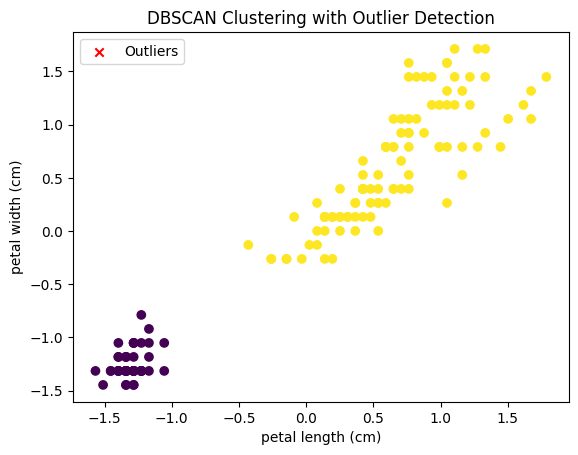

In [76]:
plot_dbscan(df, x1, x2)

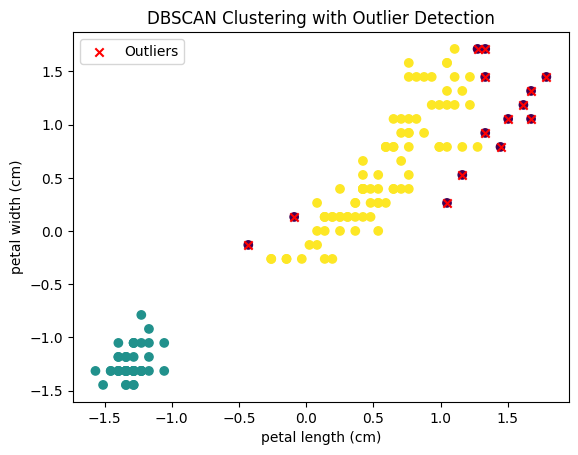

In [77]:
# A título ilustrativo!
plot_dbscan(df, x1, x2, epsilon=0.2)